In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston

In [75]:
plt.rcParams['font.family'] = 'AppleGothic'

# Boston 데이터 불러오기

In [27]:
data = load_boston()

In [28]:
X = data['data']
y = data['target']

In [29]:
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

In [30]:
boston = pd.concat([X_df, y_df], axis=1)

In [31]:
boston.columns = np.append(data.feature_names, ['Price'])

In [33]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 변수와 PRICE 간의 관계 시각화

CRIM


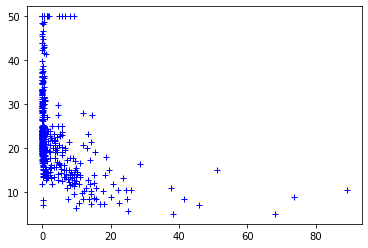

ZN


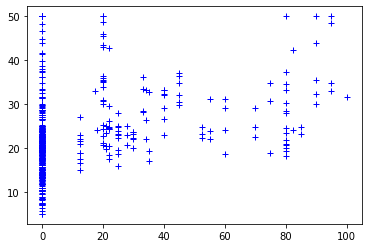

INDUS


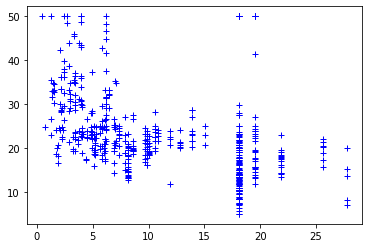

CHAS


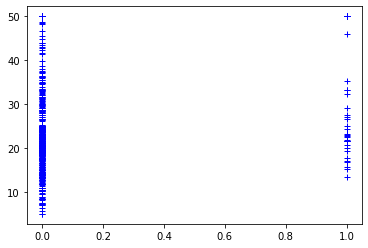

NOX


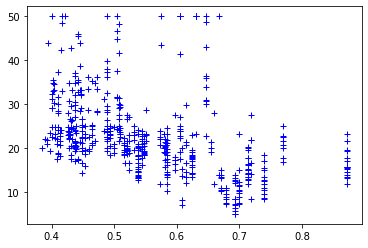

RM


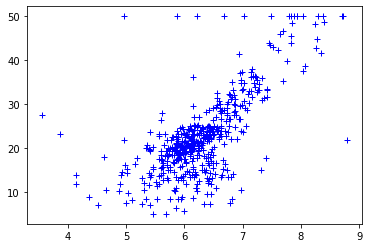

AGE


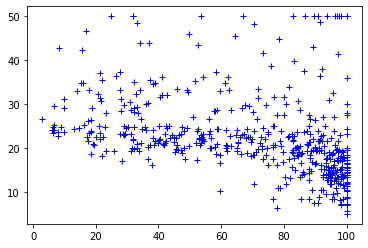

DIS


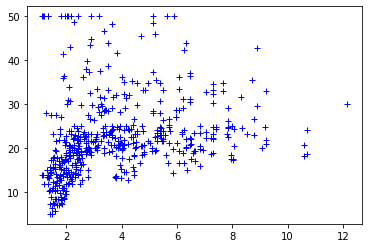

RAD


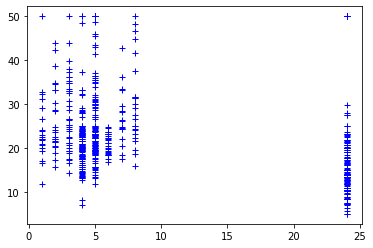

TAX


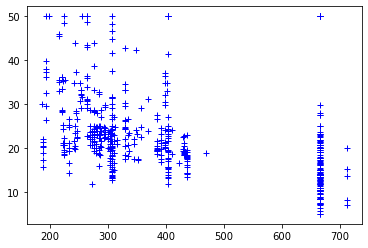

PTRATIO


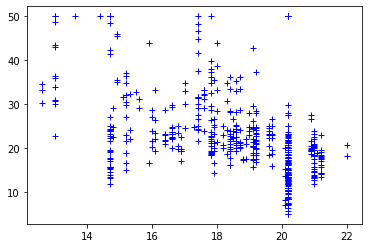

B


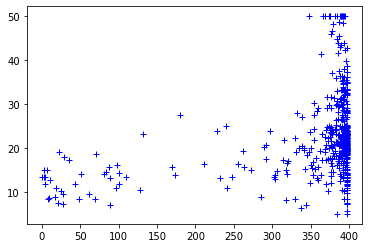

LSTAT


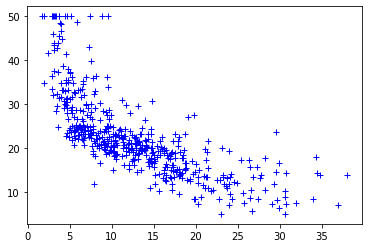

Price


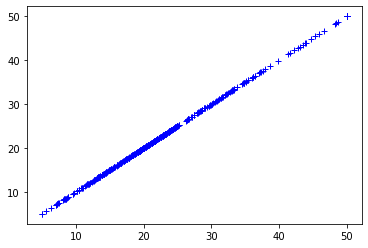

In [60]:
for name in boston.columns:
    print(name)
    plt.plot(boston['%s'%name], boston['Price'], 'b+')
    plt.show()

## Pairplot
- 너무 변수가 많아서 상관계수를 기준으로 INDUS, RM, PRTATIO, LSTAT, Price를 지정해서 pairplot을 출력한다.

## 상관관계

In [70]:
boston.corr()[['Price']].sort_values(by='Price', ascending=False)

,Price
Price,1.000000
RM,0.695360
ZN,0.360445
B,0.333461
DIS,0.249929
CHAS,0.175260
AGE,-0.376955
RAD,-0.381626
CRIM,-0.388305
NOX,-0.427321


#### < 절댓값 기준 >
- 0.8 ≤ r : 강한 상관
- 0.6 ≤ r < 0.8 : 상관
- 0.4 ≤ r < 0.6 : 약한 상관
- r ≤ 0.4 : 거의 상관 없다.


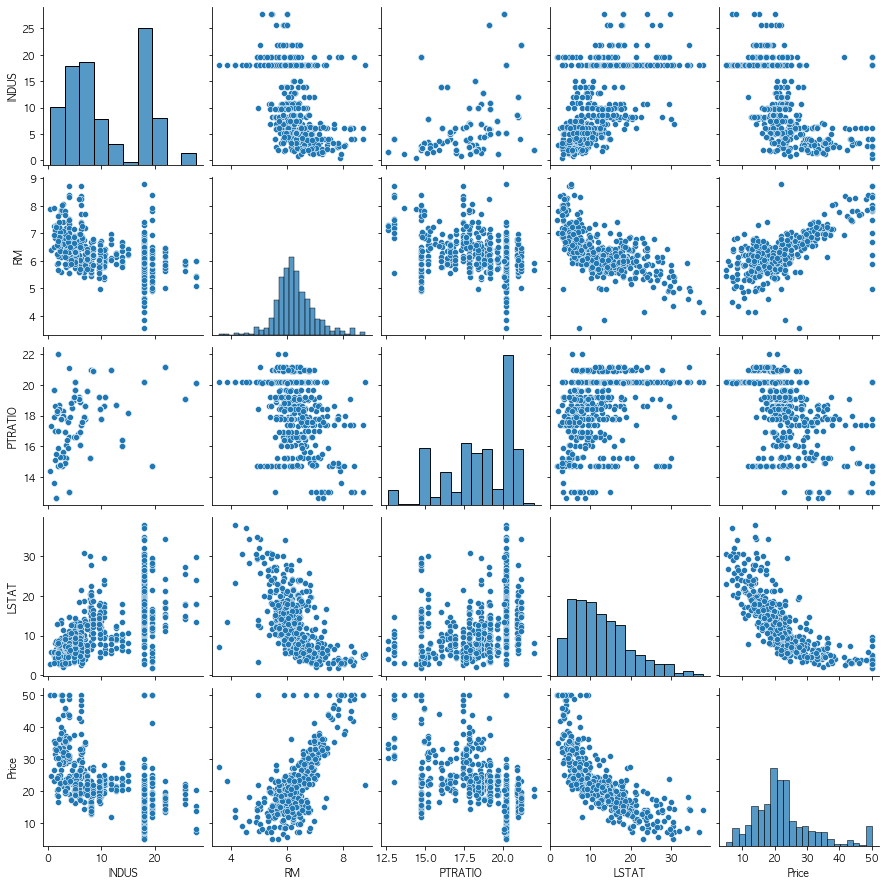

In [83]:
sns.pairplot(boston[['INDUS','RM','PTRATIO','LSTAT', 'Price']])
plt.show()

### 상관관계 시각화

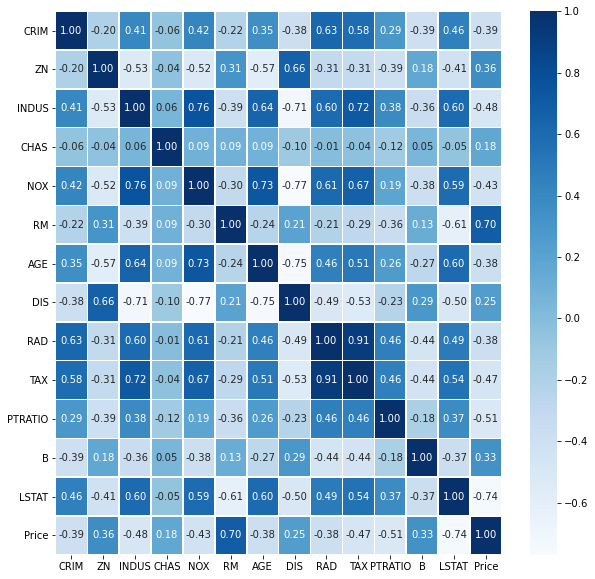

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(data = boston.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

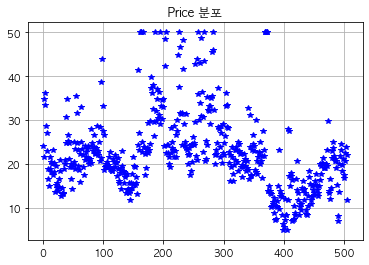

In [77]:
plt.plot(boston['Price'], 'b*')
plt.title('Price 분포')
plt.grid()
plt.show()

> #### 더블유 모양으로 분포가 이루어지고 있다.

In [79]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')